In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


import pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
df = pd.read_csv('epldata_final.csv')

In [3]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [4]:
def category(x):
    if 0 <= x < 15: return 1
    elif 15 <= x < 50: return 2
    else: return 3

In [5]:
# делаем задачу классификации
df['market_value'] =  df['market_value'].apply(category)

In [6]:
df_numeric = df.loc[:,['age', 'position_cat', 'market_value', 'page_views', 'fpl_value', \
                        'fpl_points', 'new_foreign', 'age_cat', 'big_club', 'new_signing']]

In [7]:
df['region'].fillna((df['region'].median()), inplace=True)
#df.isnull().any()

In [8]:
df = df.drop(['age_cat'], axis=1)

In [10]:
import math
df_num = df.loc[:,['age', 'market_value']]
df_num = df_num.sort_values(by='age', ascending=True)

In [11]:
def Gini(df):
    group = df.groupby([df.columns[1]]).size()
    count = df[df.columns[1]].count()
    sum_el = 0
    for i in group.index:
        sum_el += (group[i] / count)*(group[i] / count)
    return 1 - sum_el

def Entropy(df):
    group = df.groupby([df.columns[1]]).size()
    count = df[df.columns[1]].count()
    #counts = df[df.columns[1]].nunique()
    
    s0 = 0
    for j in group.index:
        s0 -= (group[j] / count)*math.log(group[j] / count, 2)
    return s0
    
porog = 0
lst = []
pred_index = df_num.index[0]
pred_category = df_num.loc[pred_index].market_value
for i in df_num.index:
    if (df_num.loc[i].market_value == pred_category):
        pred_category = df_num.loc[i].market_value
        pred_index = i
    else:
        porog = (df_num.loc[i].age + df_num.loc[pred_index].age) / 2
        lst.append(porog)
        pred_category = df_num.loc[i].market_value
        pred_index = i
        # берем только одну ветку разбиения, потому что во второй всегда будет 0 при разбиении
        print('Энтропия, если мы разобьем по порогу {0} будет - {1}'.format(porog, Entropy(df_num.loc[i:])))
        print('Джини, если мы разобьем по порогу {0} будет - {1}'.format(porog, Gini(df_num.loc[i:])))
        print()

Энтропия, если мы разобьем по порогу 19.0 будет - 0.9685238225639214
Джини, если мы разобьем по порогу 19.0 будет - 0.4155082621975097

Энтропия, если мы разобьем по порогу 19.0 будет - 0.9663378439730916
Джини, если мы разобьем по порогу 19.0 будет - 0.4140589279305412

Энтропия, если мы разобьем по порогу 19.5 будет - 0.9685311871914594
Джини, если мы разобьем по порогу 19.5 будет - 0.41525587670696074

Энтропия, если мы разобьем по порогу 20.0 будет - 0.9663242939915002
Джини, если мы разобьем по порогу 20.0 будет - 0.4137934470663265

Энтропия, если мы разобьем по порогу 20.0 будет - 0.9785921489227992
Джини, если мы разобьем по порогу 20.0 будет - 0.42048709476407164

Энтропия, если мы разобьем по порогу 20.5 будет - 0.9764085567753765
Джини, если мы разобьем по порогу 20.5 будет - 0.4190303846477569

Энтропия, если мы разобьем по порогу 21.0 будет - 0.9889937009819477
Джини, если мы разобьем по порогу 21.0 будет - 0.42589896193771626

Энтропия, если мы разобьем по порогу 21.0 буд

Джини, если мы разобьем по порогу 26.0 будет - 0.3709147473849621

Энтропия, если мы разобьем по порогу 26.0 будет - 0.87272952306735
Джини, если мы разобьем по порогу 26.0 будет - 0.367648

Энтропия, если мы разобьем по порогу 26.0 будет - 0.8766213006222019
Джини, если мы разобьем по порогу 26.0 будет - 0.3697645681581686

Энтропия, если мы разобьем по порогу 26.0 будет - 0.8659144961130925
Джини, если мы разобьем по порогу 26.0 будет - 0.36304448410337753

Энтропия, если мы разобьем по порогу 26.0 будет - 0.8678930891770793
Джини, если мы разобьем по порогу 26.0 будет - 0.36411495210329037

Энтропия, если мы разобьем по порогу 26.0 будет - 0.8623538561746379
Джини, если мы разобьем по порогу 26.0 будет - 0.3606557377049181

Энтропия, если мы разобьем по порогу 27.0 будет - 0.8663574347562862
Джини, если мы разобьем по порогу 27.0 будет - 0.36281674748992554

Энтропия, если мы разобьем по порогу 27.0 будет - 0.8549058107967265
Джини, если мы разобьем по порогу 27.0 будет - 0.35569444

In [20]:
def create_df(data_fram, feature_list):
    out = data_fram
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

df1 = df
features = ['club', 'position', 'nationality', 'position_cat', 'region']
for feature in features:
    df1[feature] = df1[feature].astype('object')
df1 = create_df(df1, features)
df1.head()

,name,age,market_value,page_views,fpl_value,fpl_sel,fpl_points,new_foreign,club_id,big_club,...,nationality_Venezuela,nationality_Wales,position_cat_1,position_cat_2,position_cat_3,position_cat_4,region_1.0,region_2.0,region_3.0,region_4.0
0,Alexis Sanchez,28,3,4329,12.0,17.10%,264,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,Mesut Ozil,28,3,4395,9.5,5.60%,167,0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,Petr Cech,35,1,1529,5.5,5.90%,134,0,1,1,...,0,0,0,0,0,1,0,1,0,0
3,Theo Walcott,28,2,2393,7.5,1.50%,122,0,1,1,...,0,0,1,0,0,0,1,0,0,0
4,Laurent Koscielny,31,2,912,6.0,0.70%,121,0,1,1,...,0,0,0,0,1,0,0,1,0,0


In [21]:
y = df1['market_value']
df1 = df1.drop(['name', 'market_value', 'fpl_sel'], axis=1)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(df1, y, test_size = 0.3, random_state=17)

In [23]:
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=17)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [24]:
predicted = clf_tree.predict(X_valid)
accuracy = accuracy_score(y_valid, predicted)
accuracy

0.8129496402877698

In [25]:
tree_params = {'max_depth': list(range(1, 11))}

tree_grid = GridSearchCV(clf_tree, param_grid=tree_params, cv = 5)
tree_grid.fit(X_train, y_train)

print(tree_grid.best_params_)
print('лучшее значение скора на кросс-валидации -', tree_grid.best_score_)
print('значение скора на отложенной выборке -', accuracy_score(y_valid,clf_tree.predict(X_valid)))

{'max_depth': 4}
лучшее значение скора на кросс-валидации - 0.8385093167701864
значение скора на отложенной выборке - 0.8129496402877698


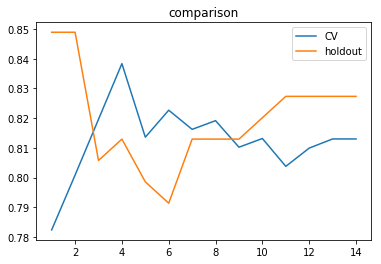

In [26]:
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

cv_scores, holdout_scores = [], []
depth = [i for i in range(1, 15)] 

for i in depth:

    clf_tree = DecisionTreeClassifier(max_depth=i, random_state=17)
    cv_scores.append(np.mean(cross_val_score(clf_tree, X_train, y_train, cv=5)))
    clf_tree.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_valid, clf_tree.predict(X_valid)))

plt.plot(depth, cv_scores, label='CV')
plt.plot(depth, holdout_scores, label='holdout')
plt.title('comparison')
plt.legend();